<a href="https://colab.research.google.com/github/Inventrohyder/NS166_final/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Authenticate the Google user
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [2]:
# Access the Google Sheet
worksheet = gc.open_by_key('1Ik1wZgqpTwPdoTVP0m_1WU4Gm2IFU43L9q7bnhXwnsc')
worksheet = worksheet.worksheet('NYST_Future')
data = worksheet.get_all_values()

In [3]:
# Transform the Google Sheet data to a Pandas DataFrame
import pandas as pd
import numpy as np
df = pd.DataFrame(data[1:], columns=data[0])

# Clean the data
df = df.replace('',np.nan)
df = df.replace('N/A', np.nan)
for column in df.columns:
  df[column] = df[column].astype('float64', errors='ignore')
df.head()

,ID,QUADNAME,Easting,Northing,Current_July_Temp,Current_Precipit,Future_temp,Future_precipit,Current_with_mink
0,1.0,ROUSES POINT,633135.654,4977693.14,20.85,844.0,23.35,970.60,0.0
1,2.0,CHAMPLAIN,623273.036,4977637.88,20.60,832.0,23.10,956.80,0.0
2,3.0,MOOERS,613536.834,4976568.65,20.60,834.0,23.10,959.10,1.0
3,4.0,RAQUETTE RIVER,514878.984,4975810.76,20.90,891.0,23.40,1024.65,0.0
4,5.0,ALTONA,603557.797,4976608.70,20.25,854.0,22.75,982.10,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18c0dd8e48>,
      dtype=object)

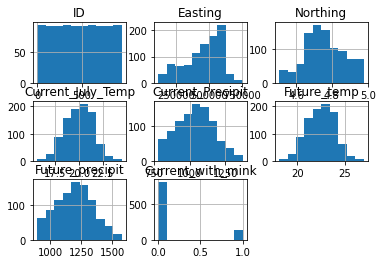

In [4]:
df.hist()

In [5]:
df.groupby(by="Current_with_mink").count()

,ID,QUADNAME,Easting,Northing,Current_July_Temp,Current_Precipit,Future_temp,Future_precipit
Current_with_mink,,,,,,,,
0.0,808,808,808,808,808,808,808,808
1.0,136,136,136,136,136,136,136,136


In [6]:
df_minked = df[df['Current_with_mink'] == 1]
df_minked.head()

,ID,QUADNAME,Easting,Northing,Current_July_Temp,Current_Precipit,Future_temp,Future_precipit,Current_with_mink
2,3.0,MOOERS,613536.834,4976568.65,20.600000,834.0,23.100000,959.10,1.0
5,6.0,ELLENBURG DEPOT,593694.309,4976601.29,19.799999,884.0,22.299999,1016.60,1.0
7,8.0,CHURUBUSCO,583837.561,4976592.07,19.200001,943.0,21.700001,1084.45,1.0
8,9.0,CHATEAUGAY,573974.945,4976436.88,19.700001,938.0,22.200001,1078.70,1.0
18,19.0,WEST CHAZY,613671.266,4963128.87,20.100000,839.0,22.600000,964.85,1.0


In [7]:
df_not_minked = df[df['Current_with_mink'] == 0]
df_not_minked.head()

,ID,QUADNAME,Easting,Northing,Current_July_Temp,Current_Precipit,Future_temp,Future_precipit,Current_with_mink
0,1.0,ROUSES POINT,633135.654,4977693.14,20.85,844.0,23.35,970.60,0.0
1,2.0,CHAMPLAIN,623273.036,4977637.88,20.60,832.0,23.10,956.80,0.0
3,4.0,RAQUETTE RIVER,514878.984,4975810.76,20.90,891.0,23.40,1024.65,0.0
4,5.0,ALTONA,603557.797,4976608.70,20.25,854.0,22.75,982.10,0.0
6,7.0,HOGANSBURG,524661.876,4975525.61,20.90,891.0,23.40,1024.65,0.0


In [8]:
# Use undersampling to balance the presence of mink frogs
df_not_minked = df_not_minked.sample(n=136, random_state=1, replace = False)

new_df = pd.concat([df_minked, df_not_minked])
new_df = new_df.sample(frac=1, random_state=42)
new_df.head()

,ID,QUADNAME,Easting,Northing,Current_July_Temp,Current_Precipit,Future_temp,Future_precipit,Current_with_mink
69,70.0,RAINBOW FALLS,514895.200,4934370.60,19.100000,1005.0,21.600000,1155.75,1.0
328,329.0,LEE CENTER,454379.375,4795673.89,20.150000,1173.0,22.650000,1348.95,1.0
201,202.0,BARNES CORNERS,434648.440,4851370.69,18.750000,1253.0,21.250000,1440.95,1.0
382,383.0,SALISBURY,515241.440,4781655.70,18.799999,1225.0,21.299999,1408.75,1.0
934,935.0,FLUSHING,599445.337,4520050.80,24.299999,1112.0,26.799999,1278.80,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18c0a2cbe0>,
      dtype=object)

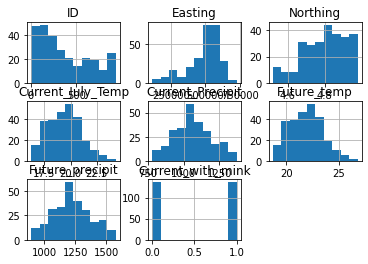

In [9]:
new_df.hist()

In [10]:
all_X = df[['Current_July_Temp', 'Current_Precipit']].to_numpy()
all_y = df['Current_with_mink'].apply(int).to_numpy()

to_model_X = new_df[['Current_July_Temp', 'Current_Precipit']].to_numpy()
to_model_y = new_df['Current_with_mink'].apply(int).to_numpy()

Automatically created module for IPython interactive environment
name: Nearest Neighbors ; score 0.6909090909090909
name: Linear SVM ; score 0.7090909090909091
name: RBF SVM ; score 0.7818181818181819
name: Gaussian Process ; score 0.7090909090909091
name: Decision Tree ; score 0.6363636363636364
name: Random Forest ; score 0.7090909090909091
name: Neural Net ; score 0.7090909090909091
name: AdaBoost ; score 0.7272727272727273
name: Naive Bayes ; score 0.6909090909090909
name: QDA ; score 0.7454545454545455


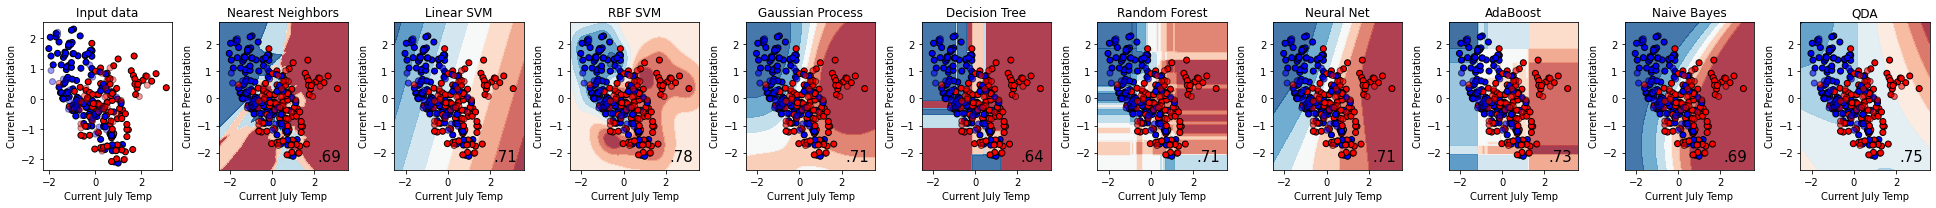

In [11]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# Modified to fit the frogs by Haitham Alhad
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


current_data = (to_model_X, to_model_y)

datasets = [current_data]

figure = plt.figure(figsize=(27, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
        ax.set_xlabel("Current July Temp")
        ax.set_ylabel("Current Precipitation")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4,
               edgecolors='k')

    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print('name:', name, '; score', score)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        if ds_cnt == 0:
            ax.set_title(name)
            ax.set_xlabel("Current July Temp")
            ax.set_ylabel("Current Precipitation")
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [12]:
print(f'Actual number of places supporting mink frogs now {sum(all_y)}')

for name, clf in zip(names, classifiers):
  print(name, sum(clf.predict(X)))

Actual number of places supporting mink frogs now 136
Nearest Neighbors 134
Linear SVM 119
RBF SVM 121
Gaussian Process 118
Decision Tree 107
Random Forest 114
Neural Net 122
AdaBoost 117
Naive Bayes 124
QDA 134


In [13]:
# Using the classifiers to find the number of places
# predicted to have mink frogs

print(f'Actual number of places supporting mink frogs now {sum(all_y)}')

to_predict = StandardScaler().fit_transform(all_X)

for name, clf in zip(names, classifiers):
  print(name, sum(clf.predict(to_predict)))

Actual number of places supporting mink frogs now 136
Nearest Neighbors 458
Linear SVM 411
RBF SVM 383
Gaussian Process 406
Decision Tree 340
Random Forest 384
Neural Net 427
AdaBoost 409
Naive Bayes 449
QDA 444


In [15]:
future_X = new_df[['Future_temp', 'Future_precipit']].to_numpy()

to_predict = StandardScaler().fit_transform(future_X)

for name, clf in zip(names, classifiers):
  print(name, sum(clf.predict(to_predict)))

Nearest Neighbors 134
Linear SVM 119
RBF SVM 121
Gaussian Process 118
Decision Tree 107
Random Forest 114
Neural Net 122
AdaBoost 117
Naive Bayes 124
QDA 134
